# <font color="darkblue">Bridging the epidemic models: <br>from exponential to SIR/SEIR/SIRX to Agent-based models</font>

## An interactive notebook/lesson on nowcasting epidemic spreading 
Christopher Monterola* and Erika Fille Legara   
Aboitiz Chairs for Data Science   


### General Notes

We provide in this Jupyter notebook the bridging mathematics needed to understand how the different classes of epidemic models are related to each other, and to what extent one model can reproduce the result of another. This is a notebook trilogy highlighting different facets of epidemic modeling:

**Notebook 1.** A case study on fitting and trend forecasting.   
**Notebook 2.** A theoretical framework and numerical demonstration on how different models are derivable from one another. Covered in this notebook are algorithms and discussions on SIR, SEIR models. Also provided is an algorithm for changing reproduction number through Bayesian fitting. This is written as a live case on mathematical modeling and provides scenario modelling of epidemics based on real time data. Background on basic python programming and differential calculus necessary.   
**Notebook 3.** From compartmental models to real-world granular model of epidemics. On the changing basic reproduction number.   
**Notebook 4.** On Epidemic Indicators and Forecasting the New Normal: Is measuring $R_0$ sufficient?

-----
*Communications to:    
cmonterola@aim.edu  
Head, Aboitiz School of Innovation, Technology and Entrepreneurship (ASITE)   
Head, Analytics, Computing and Complex Systems Laboratory (ACCeSs)   
Professor, Asian Institute of Management (AIM)    
Website: www.chrismonterola.net



## <font color="darkblue">Introduction</font>

A novel coronavirus (COVID-19) virus has crippled society, markets, and economies at an alarming rate globally. On 11 March 2020, the World Health Organization officially described the situation as a pandemic, which at that time had already resulted to 118,000 cases (detected) in 114 countries, and 4,291 deaths.  The emergence of this pandemic is not unexpected \cite{webby2003,mills2004}; with the 1918 pandemic the worst to date, killing an estimated 50-100 million persons. In fact, not only are pandemics expected to reemerge, they are expected to emerge in an increased frequency, which is mainly due to the of the increasing emergence of viral disease from animals~\cite{madhav2017}. 

One of the challenges right now for most countries is to understand the pandemic potential of COVID-19 as government agencies, specially health organizations, struggle to acquire enough manpower and healthcare resources to track and detect the prevalence of the virus, with hopes of slowing it down. Aside from the socioeconomic impact of this resource scarcity, it has also resulted to limited and unreliable data for some countries including the Philippines. One obvious reason for under detection is limited testing kits that has gained a mass attention and call for immediate action in many developing nations like the Philippines, Iran, Myanmar, India, etc.

In this work, we develop a framework to bridge some of these data gaps, allowing us to nowcast the spread of epidemics using a simple exponential fitting that is optimize specifically for COVID19. This proposed approach also allows us to make estimates on when epidemic growths would peak and then eventually flatten. The work proposed by Fergusson *et al.* is most probably inaccurate as it underestimates the inherent stochasticity of the network and medium of spreading of the virus. In such a context, an adaptive empirical model, has more practical value especially on the impact of community quarantines and/or mass testing. 

The work, therefore, provides an early assessment of effectiveness of various social distancing measures (and other measures) to potentially flatten the curve. With such a tool, assessment for different countries with different demographic make-up and geospatial signatures can be compared in real time. 


## <font color="darkblue">Section 1. Theoretical Framework</font>

### <font color="#524D4D">1.1 Exponential: a generic model for random epidemic spreading (at the onset)</font>


Finding the peak of an epidemic in the real-world and in real-time is complicated mainly because:

1. the network of interaction is both complex and spatiotemporally dynamic. For example, it can evolve as result of intervention (normal vs. total lockdown) and/or has strong dependence on spatial setting (e.g. different spread dynamics in office, home, and transport points).

2. the extent it can spread varies both in terms of the emedium (airborne vs. plastic surface vs. metal surface) and different environmental parameters (temperature, humidity, etc).

A first approximation is to simplify the above by assuming that a generic mechanism can be derived to account for all of these factors. At the onset, the spreading can be transmitted randomly with a rate $r$ at time $t$ as:

\begin{equation}
y(t) = y_t = y_0 (1 + r)^t
\end{equation}


where $y(t)$ is the number of infected population at time $t$ and $y_0$ is the initial infected population. This result is especially true for COVID19 that has been shown to be asymptomatic for 11.5 days and hence it can infect the population with an effective rate $r$. Note that this immediately follows from the fact that at $t=1$ the number of infected is given by $y_{t=1}=y_0 + r y_0 = y_0 (1 + r)$, at $t=2$ this becomes $y_{t=2}= y_0 (1 + r) + r y_0 (1 + r) = y_0 (1 + r)^2$, and so on and so forth; and, by intuition, we can get the above expression.

The expression can be rewritten in a more compact form as exponential:

\begin{equation}
y = y_0 \exp^{bt}
\end{equation}

where the rate $r$ is derivable as:

\begin{equation}
r=\exp^{b}-1
\end{equation}

From the expression above, one can show that the infected population will double every

\begin{equation}
t_{\texttt{double}}= \frac{\ln(2)}{\ln(1+r)}.
\end{equation}


The above approximation holds as long as the number of people infected continue to grow unabated, which is true under the assumption that the system is still far from capacity ($y_t << y_{max}$); that is, there are still many susceptible individuals to infection. 




### <font color="darkgreen">Some Exercises</font>

#### Exercise 1. Prove that $y = y_0 (1 + r)^t$ can be written as $y = y_0 \exp^{bt}$ where $r=\exp^{b}-1$.

#### Solution:    

Take the logarithm ($\ln$) of both sides. 

\begin{equation}   
\ln (y) =  \ln (y_0 (1 + r)^t)  \\
\ln (y) =  \ln (y_0) + \ln (1 + r)^t \\ 
\ln (y) =  \ln (y_0) + t \ln (1 + r)   \\ 
\ln (y) - \ln (y_0) = t \ln (1 + r)   \\
\ln (\frac{y}{y_0}) = t \ln (1 + r)
\end{equation}

Take the $\exp$ of both sides.        
   
\begin{equation} 
\bigg (\frac{y}{y_0} \bigg) = \exp (t\ln (1 + r)) \\
\bigg (\frac{y}{y_0} \bigg ) = \exp (bt) 
\end{equation}

where $b = \ln (1 + r)$. Finally, by taking $\exp$ of both sides, we get $r=\exp^{b}-1$.


#### Exercise 2. Prove that the doubling time is given by $t_{double}= \frac{\ln(2)}{\ln(1+r)}$

#### Solution:

\begin{equation}  
\bigg (\frac{y}{y_0} \bigg) = \bigg ( \frac{2y_0}{y_0} \bigg) = 2 = \exp \bigg (t_{\texttt{double}}\ln (1 + r) \bigg ) \\
\ln (2) = (t_{\texttt{double}}\ln (1 + r)) \\
t_{\texttt{double}}= \frac{\ln(2)}{\ln(1+r)}
\end{equation}

#### Exercise 3. Show that $y = 2\ln(2) y_0 \exp(t/ t_{double})$ and that when $t_{double}>5$, the results deviates from linear trend by about $2\%$

#### Solution:

\begin{equation} 
y = 2 \ln2 y_0 \exp(\frac{t}{t_{double}}) \\
y \sim  2 \ln2 y_0  +  \frac{t}{t_{double}} + \frac{1}{2}\frac{t}{t_{double}}^2 + ... \\
y = 2 \ln2 y_0 \exp(\frac{t}{T_2}) = \sim  2 \ln2 y_0 (1 +  \frac{t}{T_2} + \frac{1}{2}\frac{t}{T_2}^2 + ...)
\end{equation}

### <font color="#524D4D">1.2 From Exponential to Logistics: the Case of Finite Capacity Growth</font>

The exponential expression aabove can also be written in differential form as: 

\begin{equation}
\frac{dy}{dt} = r y 
\end{equation}

If we assume that the system has a finite capacity, we can improve the model by adding another variable $y_{max}$ such that when $y = y_{max}$, the rate of change of $y$ is zero ($\frac{dy}{dt}=0$). We thus reformulate the rate equation as:

\begin{equation}
\frac{dy}{dt} = r y \bigg ( \frac{y_{max}-y}{y_{max}} \bigg ) = r y \bigg (1 - \frac{y}{y_{max}} \bigg )
\end{equation}

Notice that if $y_{max} >> y$, we recover the previous exponential expression. The solution to this finite capacity spreading (limit of growth is $y_{max}$; $\frac{dy}{dt} =0$) is a logistic function that can be solved in a straightforward manner by separation of variables, and is given by:


\begin{equation}
y = \frac{y_{max}}{1 + A \exp(-rt)}
\end{equation}

where $A = \frac{y_{max}-y0}{y0}$. 

Again, we note that when $y_{max} >> y_0$, we recover the simpler exponential form. 


### <font color="darkgreen">Exercise</font>

#### Exercise 3.  Compute the Uncertainty and Certainty of forecast for both the logistic and exponential fits


To compute the propagation of the projected first order uncertainty (deviation) for the exponential, we have:

\begin{equation}
\Delta y \approx dy = y_0 b \exp^{bt};
\end{equation}

while for the logistic, it is given by:

\begin{equation}
\Delta y \approx dy = \frac{A r y_{max}}{A + \exp^{rt}}
\end{equation}

**Derive this using pen and paper.**


### <font color="#524D4D">1.3 Illustrations: Fitting with Actual Data </font> 

In the succeeding code, we show how the equations in Sections 1.1 and 1.2 can be implemented using real data. We first look at the case of those countries exhibiting exponential growth during the first 18 days of the epidemic (per country) when significant number of cases are reported (i.e., $>10$ confirmed cases). Then, we look at cases when the curves seem to have flattened.

#### For MSDS Students: Code for exponential fitting. See for reference Notebook 1 (Mathematics for Data Science).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from sympy import Symbol, symbols, integrate
from msdshelper import *

%matplotlib inline

Let's track the following countries at the onset: Philippines, China, South Korea, Iran, Italy, USA, UK, France.

In [2]:
df = pd.read_excel('epi-data-pp.xlsx')
countries = ['Philippines', 'China', 'South Korea', 'Iran', 'USA', 'Italy', 'UK', 'France']

In [3]:
df.head(n=3)

,Days,Country,Cases,Deaths,Cases_Cumulative,Deaths_Cumulative
0,2,USA,20,1,20,1
1,3,USA,14,4,34,5
2,4,USA,22,3,56,8


#### 1.3.1  Illustration 1: Consider USA as an example of exponentially growing cases
In the figure below, we plot the number of confirmed cases in the US in a log-linear plot. The broken line is the exponential fit to the empirical data (open circle). The trend, at the onset, suggests that the number of confirmed cases in the US doubled every 2.32 days, with $R^2 \sim 1$.

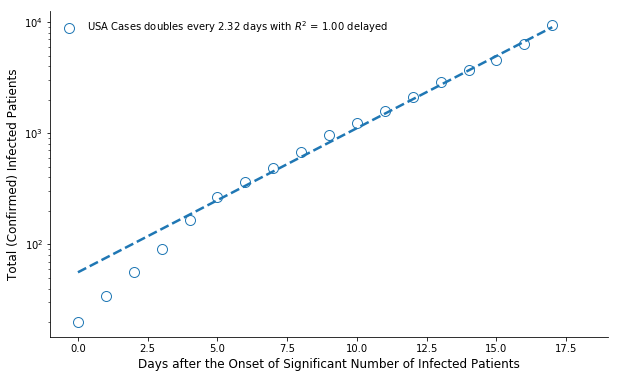

In [4]:
y = df[df.Country == 'USA']['Cases_Cumulative']
growth_cases_exp_countries(df, ['USA'])

#### 1.3.2  Illustration 2: Consider USA as an example of exponentially growing confirmed cases and recorded deaths

Exponential curve and its corresponding fit for COVID19 reported cases (hollow circle) and deaths (solid circle and dashed lines). In both cases, we obtained $R^2$ values  $> 0.99$.

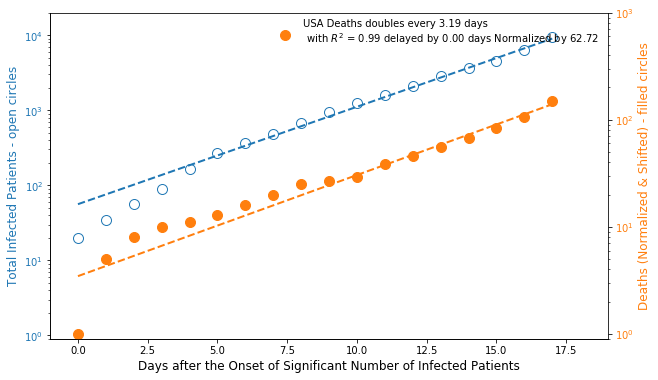

In [5]:
y = df[df.Country == 'USA']['Cases_Cumulative']
ydeaths = df[df.Country == 'USA']['Deaths_Cumulative']
growth_cases_deaths(y, ydeaths, 'USA')

The normalization indicates that for every 62.72 cases reported, about 1 death is recorded. Notice how similar the curves are. The same trend is observed for all the other countries mentioned (except for China and South Korea) at the onset. 

#### 1.3.3  Illustration 3: Consider USA, Italy, Iran, and the Philippines



Figure 2 demonstrates the exponential nature of the first weeks when a significant portion of the population 
($>10$) is reported as COVID19 positive in different countries. In all instances, the observed fit has an $R^2>>0.97$ indicative of exponential growth of cases. 


The growth of an exponential curve is generally non-intuitive. Without the help of quantitatively trained individuals, the idea of 10 infected individuals growing to 20,000 within 2 weeks is not easily digestable. We note here, however, that in cases when testing kits are limited, the exponential fit obtained during the early stage is more reliable and less skewed in terms of under detection since they represent a larger number of reported cases. That is, for an exponentially growing curve, we need also an exponentially growing testings or undetected cases will also grow exponentially. 

A daily progressio for countries used above are shown in appendix A.

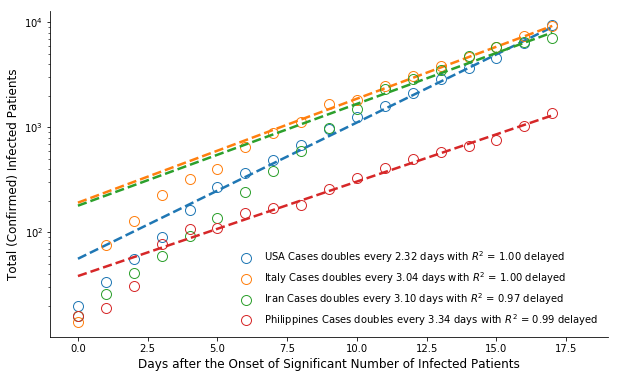

In [6]:
growth_cases_exp_countries(df, ['USA', 'Italy', 'Iran', 'Philippines'])

#### 1.3.4  From Exponential to Logistics: the Cases of China and South Korea


Figure 2 looks at cases when the growth of COVID cases have been contained and shows us that the time to flatten he curve can vary greatly. While South Korea was able to do it in 1 month with only 5000 cases, China extends the flattening to 2 months with 80,000 casualties.

Comparing with Figure 1, we note that Iran and Italy has not shown visually that it will peak anytime soon and a quantitative method to visually see this is the main contribution of this article that will be discussed in the next section.

#### 1.3.4.1: China

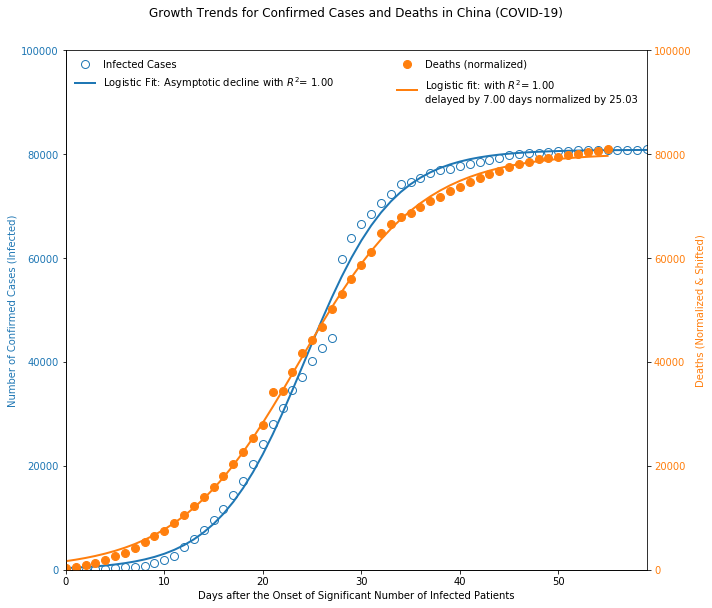

In [7]:
y = df[df.Country == 'China']['Cases_Cumulative']
ydeaths = df[df.Country == 'China']['Deaths_Cumulative']
growth_cases_deaths_logi(y, ydeaths, 'China', ymax = 100000, lagdays = 7, semilog = False)

### Figure 2. Caption

Logistic growth of Covid19 in china (2A) and South korea (2B). The corresponding rates for both countries are for China $r=0.226$ while for South Korea $r=0.322$. South korea peaks after two weeks and "flattened the curve" in one month while China was able to accomplish such in twice the time, 4 weeks to peak and 2 months to flattened.

#### 1.3.4.2: South Korea

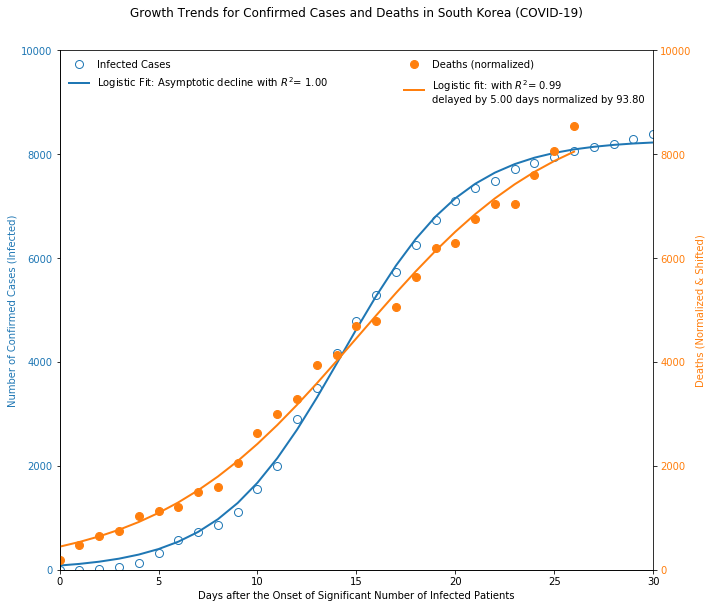

In [8]:
y = df[df.Country == 'South Korea']['Cases_Cumulative']
ydeaths = df[df.Country == 'South Korea']['Deaths_Cumulative']
growth_cases_deaths_logi(y, ydeaths, 'South Korea', ymax = 10000, lagdays = 5, semilog = False)

#### 1.3.5. Declining Numbers: The Cases of China and South Korea 

Another way of interpreting the asymptotic decay trends in China and South Korea is by looking at the how fast the number of cases has been declining over time; and, for a logistic function, the tail end is also an exponential as shown below.

In [9]:
def exponential(x,a,b):
    return a * np.exp(b*x)

def logistic(x,ymax,A,r):
    return ymax/(1+ A*np.exp(-r*(x)))

In [10]:
## tail end of the curve
df_march = pd.read_excel('COVID_perday.xlsx')
df_march.head()

,2020-03-01 00:00:00,Philippines,USA,Italy,South Korea,China,France,Iran,UK,Malaysia
0,1,0,3,240,813,574,43,205,5,0
1,2,0,20,561,595,205,30,385,13,4
2,3,0,14,146,686,127,48,523,4,0
3,4,0,22,667,600,119,34,835,11,7
4,5,0,34,587,516,117,73,586,34,14


In [11]:
SK_perday = df_march['South Korea']

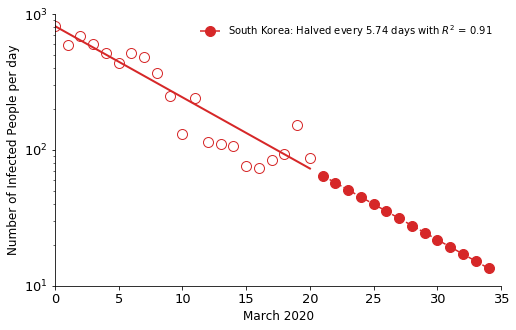

In [12]:
#South Korea
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 13})

y = SK_perday
x = np.arange(0, len(y))
popt, pcov = curve_fit(exponential, x, y, p0 = [0, 0])

x_fit = np.arange(0, len(y))
y_exp_fit = exponential(x_fit, *popt)

x_projection = np.arange(len(y), len(y)+14)
y_projection=exponential(x_projection, *popt)

rate=(np.exp(tuple(popt)[1]))-1
double= np.log(2)/np.log(1+ rate)
R_squared=r2_score(y_exp_fit, y[-len(y_exp_fit):])

plt.semilogy(x,y,'o', ms=10, markerfacecolor='none', color = tab10[3],label='');
plt.semilogy(x_projection,y_projection,'o--', ms=10, color = tab10[3], 
         label='South Korea: Halved every %.2f days with $R^2$ = %.2f' %(-double, R_squared))
plt.semilogy(x_fit, y_exp_fit,'-', lw=2, color = tab10[3])

plt.legend(frameon=False, fontsize=10)
plt.xlim(0, 35)
plt.ylim(10, 1000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('March 2020', size=12);
plt.ylabel('Number of Infected People per day', size=12);
plt.savefig('SouthKorea.png', dpi=150)


### Figure 3A Caption
Decay curve rate of South Korea as it approaches the asymptotic ("flattening") phase.


### Appendix: Additional Exercises

#### Home Exercise 1. Exponential at the onset of all countries.

As discussed above, all countries will have exponential growth at the onset. Shown below are the first 14 days trend on various countries when significant number of cases are confirmed (> 5 cases) and sustained (no zero reported cases for 5 successive days). 

Task 1: Replicate the figure we have generated below. Impose the following constraint when selecting the data: (a) No zero reported cases for 5 consecutive days; (b) should have at least 5 cases (infected $> 5$) at the starting point.

<img src="Exponential.png" style="height:500px">


### Home Exercise 2 (Expert level):  Exponential Trajectory Fitting Using 7-11 consecutive days

#### Why do we run an exponential fit and not a mere running average? (Journal Submission in Preparation)

We now describe here a simple procedure that will allow us to track the growth of COVID19 from various countries and ascertain if the curve is being flattened.  Running average is a practical tool for cases when no functional trend is imminent like in stock market or commodity pricing. Here, we know that the fit is given by an exponential or a logistic function. The gradient of both trends varies proportional to exponential for both. For exponential it is obvious, for logistic for example, the slope of a running exponential fit is best fitted by: 

\begin{equation}
y = \frac{y_{max} r A \exp(-rt)}{1 + A \exp(-rt)^2}
\end{equation}

when $t$ is significantly larger than $r$, which is true for COVID19 case where $r$ of China and South Korea are less than 0.40, $(1 + A \exp(-rt))^2 \sim 1$, hence, the leading term varies exponentially too.


### Why 7-11 days, proof of simulation?

COVID19 is asymptomatic within 7-11 days and as expected the dynamics are enveloped during this temporal segment. 


In [13]:
df = pd.read_excel('COVID_cumulative.xlsx')
df.head()

,2020-03-01 00:00:00,Philippines,USA,Italy,South Korea,China,France,Iran,UK,Malaysia
0,1,0,3,240,813,574,43,205,5,0
1,2,0,23,801,1408,779,73,590,18,4
2,3,0,37,947,2094,906,121,1113,22,4
3,4,0,59,1614,2694,1025,155,1948,33,11
4,5,0,93,2201,3210,1142,228,2534,67,25


### CREATE/INSERT THE CODE AND FIGURE for FIGURE 4 here.

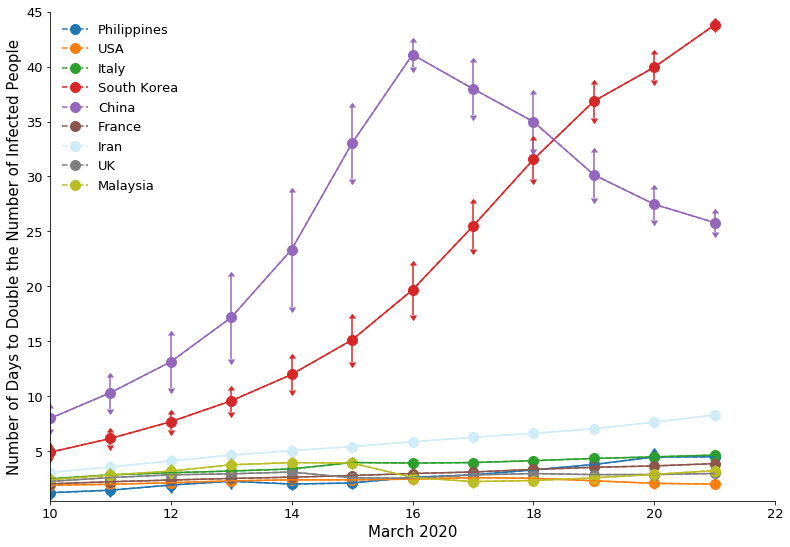

In [14]:
running_exponential(df, ['Philippines', 'USA', 'Italy', 'South Korea', \
                         'China', 'France', 'Iran', 'UK', 'Malaysia'], xmax = 22)

### Figure 5. Caption  (RUN ALL COUNTRIES to improve the FIGURE HERE!)
Trend of doubling derived from the exponential fit using the procedure described. Notice that all countries are confined to 2-4 doubling days except for South korea, China and Iran. The uncertainty represented as $t_{double}*(1-R^2)$.

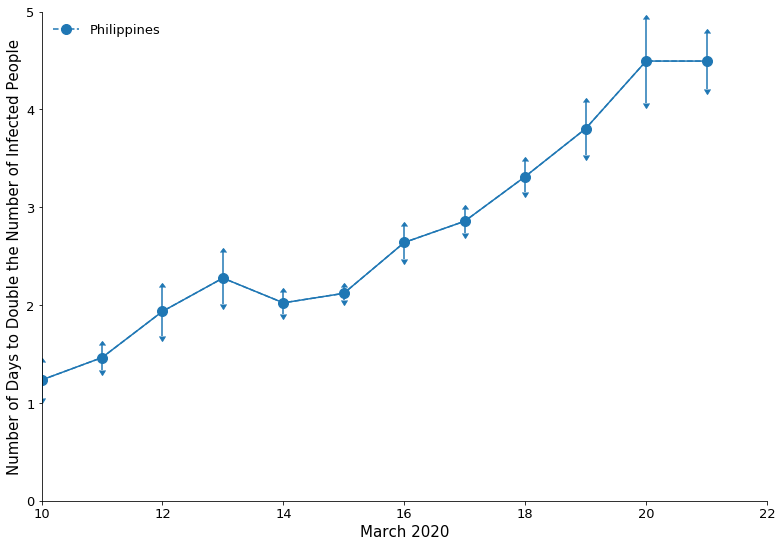

In [15]:
running_exponential(df, ['Philippines'], ymax = 5, xmax=22)